In [3]:
import pandas as pd
import numpy as np
# from pandas_profiling import ProfileReport
# from ydata_profiling import ProfileReport
# すべての列を表示する設定
pd.set_option('display.max_columns', None)
# import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

# 全国不動産受付帳 登記原因を26個のみ，

In [4]:
df_reg26 = pd.read_csv("C:/Users/GUESTUSER/Desktop/fujiwara/data/不動産登記受付帳_登記原因26個.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/GUESTUSER/Desktop/fujiwara/data/不動産登記受付帳_登記原因26個.csv'

In [4]:
df_reg26.head()

,register_num,register_date,register_type,reason,pref,new_or_existing,type,location,land_num,other,city,size,use_district,lat,lon,building_coverage_ratio,floor_area_ratio,official_price,land_price,location_all,year_month,land_id
0,3768,2023-02-09,単独,所有権移転相続・法人合併,東京都,既,区分建物,北区赤羽南1丁目,3-1-304,NaN,北区,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,東京都北区赤羽南1丁目,2023-02,2975943.0
1,3687,2023-02-09,連先,登記名義人の氏名等についての変更・更正,東京都,既,区分建物,北区田端新町1丁目,108-2-17,NaN,北区,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,東京都北区田端新町1丁目,2023-02,2971892.0
2,3683,2023-02-09,連先,滅失,東京都,既,建物,北区王子本町2丁目,11-15,NaN,北区,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,東京都北区王子本町2丁目,2023-02,2971204.0
3,3701,2023-02-09,連続,所有権移転売買,東京都,既,区分建物,北区赤羽西1丁目,2149-12-1002,NaN,北区,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,東京都北区赤羽西1丁目,2023-02,2976462.0
4,1451,2023-02-09,単独,地目変更・更正,広島県,既,土地,呉市安浦町安登東1丁目,1530-1,3.0,呉市,852.250843,NaN,34.261637,132.72798,NaN,NaN,29200.0,2.488572e+07,広島県呉市安浦町安登東1丁目,2023-02,2251163.0


In [5]:
# 同じ建物
df_reg26[df_reg26["land_id"]==2975943]

,register_num,register_date,register_type,reason,pref,new_or_existing,type,location,land_num,other,city,size,use_district,lat,lon,building_coverage_ratio,floor_area_ratio,official_price,land_price,location_all,year_month,land_id
0,3768,2023-02-09,単独,所有権移転相続・法人合併,東京都,既,区分建物,北区赤羽南1丁目,3-1-304,NaN,北区,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,東京都北区赤羽南1丁目,2023-02,2975943.0
2700090,6320,2023-02-27,単独,所有権移転売買,東京都,既,区分建物,北区赤羽南1丁目,3-1-304,NaN,北区,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,東京都北区赤羽南1丁目,2023-02,2975943.0
5582776,30906,2023-08-25,連先,所有権移転売買,東京都,既,区分建物,北区赤羽南1丁目,3-1-304,NaN,北区,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,東京都北区赤羽南1丁目,2023-08,2975943.0
6173344,30907-(あ),2023-08-25,連続,抵当権の設定,東京都,既,区分建物,北区赤羽南1丁目,3-1-304,NaN,北区,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,東京都北区赤羽南1丁目,2023-08,2975943.0
9978055,30907-(い),2023-08-25,連続,抵当権の設定,東京都,既,区分建物,北区赤羽南1丁目,3-1-304,NaN,北区,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,東京都北区赤羽南1丁目,2023-08,2975943.0


In [40]:
df_unique_land_id['size']

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4          852.250843
              ...    
9989431           NaN
9989434           NaN
9989435           NaN
9989436           NaN
9989466           NaN
Name: size, Length: 5356646, dtype: float64

In [42]:
# typeが土地以外の行をフィルタリング
non_land_df = df_reg26[df_reg26['type'] != '土地']

# size列が欠損しているかどうかを確認
size_column_present = 'size' in non_land_df.columns
size_missing_count = non_land_df['size'].isna().sum() if size_column_present else "size列は存在しません"

# land_price列が欠損しているかどうかを確認
land_price_column_present = 'land_price' in non_land_df.columns
land_price_missing_count = non_land_df['land_price'].isna().sum() if land_price_column_present else "land_price列は存在しません"

# 結果を表示
print(f"size列が存在するか: {size_column_present}, 欠損値の数: {size_missing_count}")
print(f"land_price列が存在するか: {land_price_column_present}, 欠損値の数: {land_price_missing_count}")

size列が存在するか: True, 欠損値の数: 3359067
land_price列が存在するか: True, 欠損値の数: 3359067


In [43]:
# typeが土地以外の行をフィルタリング
non_land_df = df_reg26[df_reg26['type'] != '土地']

# size列が欠損でない行が存在するか確認
size_not_missing_exists = non_land_df['size'].notna().any()

# land_price列が欠損でない行が存在するか確認
land_price_not_missing_exists = non_land_df['land_price'].notna().any()

# 結果を表示
print(f"size列が欠損でない行が存在するか: {size_not_missing_exists}")
print(f"land_price列が欠損でない行が存在するか: {land_price_not_missing_exists}")

size列が欠損でない行が存在するか: False
land_price列が欠損でない行が存在するか: False


In [44]:
print(df_unique_land_id['land_price'].min())
print(df_unique_land_id['land_price'].max())

29.59629998596812
312427573120.00183


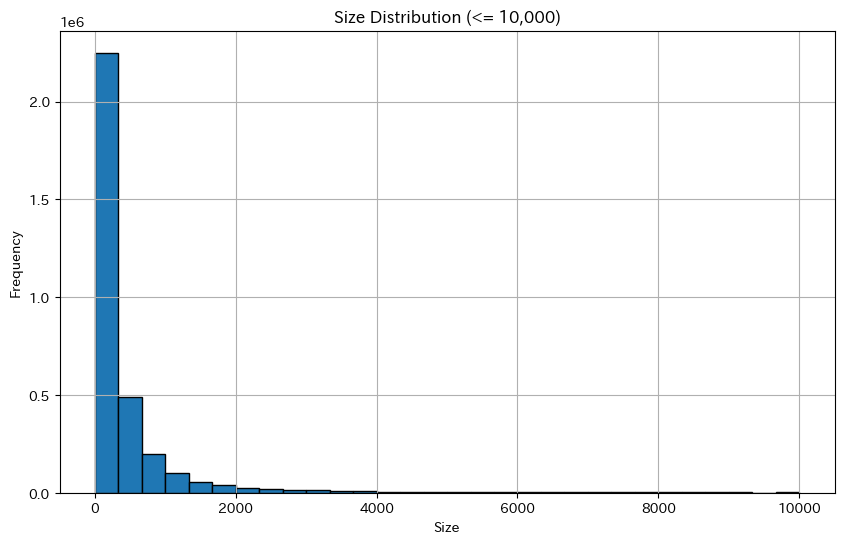

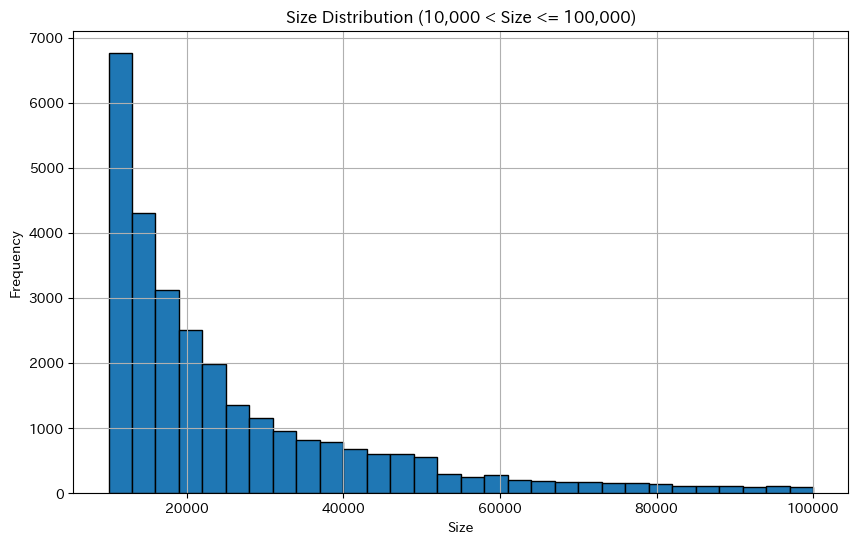

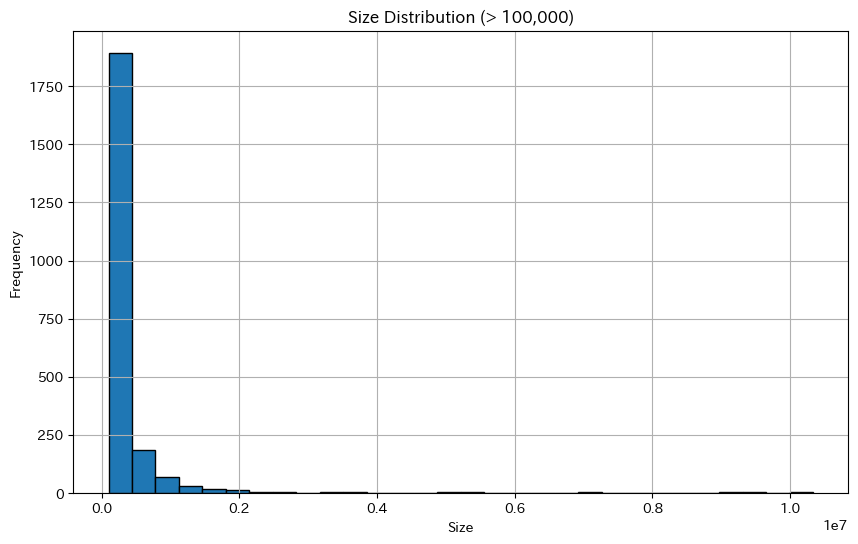

In [36]:
# land_idの重複を除去
df_unique_land_id = df_reg26.drop_duplicates(subset='land_id')

# sizeが10,000以下の行をフィルタリング
df_size_le_10000 = df_unique_land_id[df_unique_land_id['size'] <= 10000]

# sizeが10,000以上100,000以下の行をフィルタリング
df_size_10000_to_100000 = df_unique_land_id[(df_unique_land_id['size'] > 10000) & (df_unique_land_id['size'] <= 100000)]

# sizeが100,000以上の行をフィルタリング
df_size_ge_100000 = df_unique_land_id[df_unique_land_id['size'] > 100000]

# sizeが10,000以下のヒストグラムを作成
plt.figure(figsize=(10, 6))
plt.hist(df_size_le_10000['size'].dropna(), bins=30, edgecolor='black')
plt.title('Size Distribution (<= 10,000)')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# sizeが10,000以上100,000以下のヒストグラムを作成
plt.figure(figsize=(10, 6))
plt.hist(df_size_10000_to_100000['size'].dropna(), bins=30, edgecolor='black')
plt.title('Size Distribution (10,000 < Size <= 100,000)')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# sizeが100,000以上のヒストグラムを作成
plt.figure(figsize=(10, 6))
plt.hist(df_size_ge_100000['size'].dropna(), bins=30, edgecolor='black')
plt.title('Size Distribution (> 100,000)')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


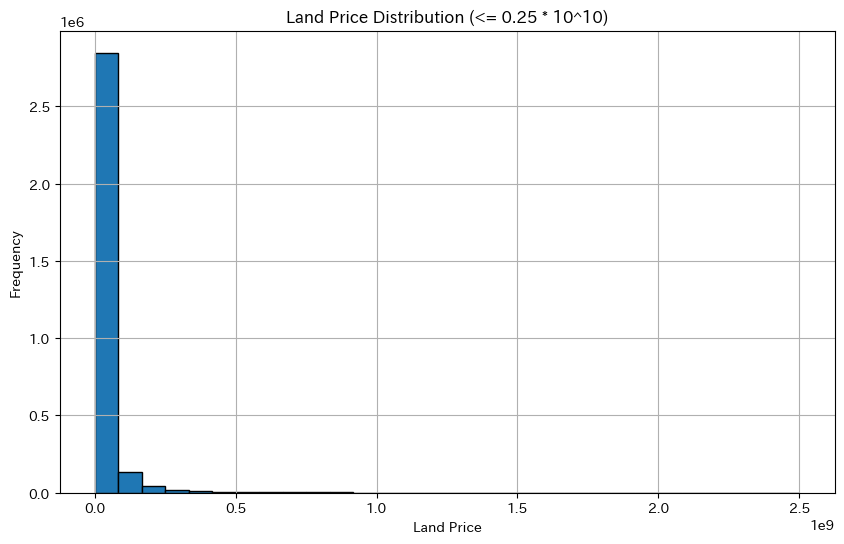

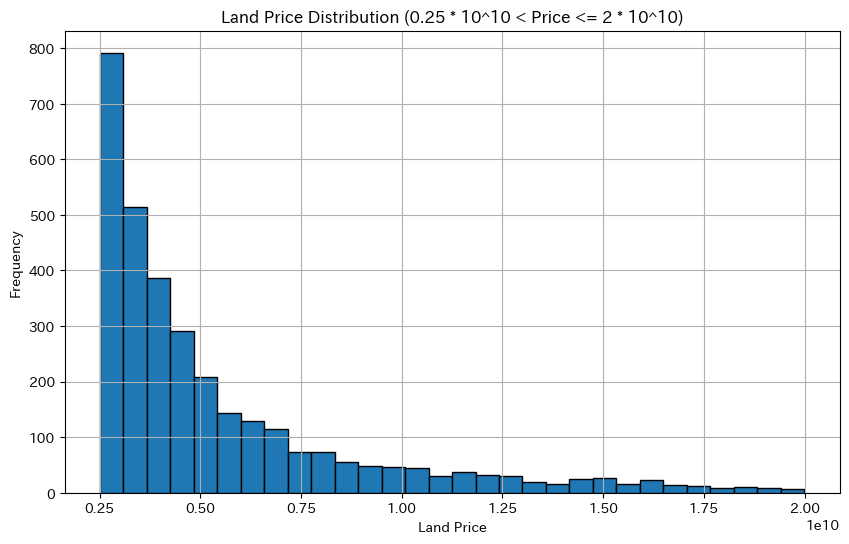

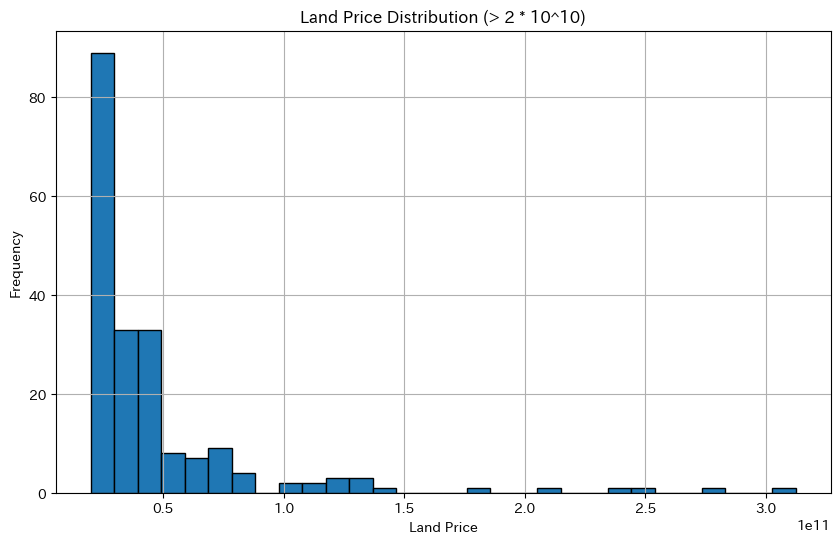

In [58]:
# land_idの重複を除去
df_unique_land_id = df_reg26.drop_duplicates(subset='land_id')

# land_priceが0.25*10^10以下の行をフィルタリング
df_price_le_0_25e10 = df_unique_land_id[df_unique_land_id['land_price'] <= 0.25*10**10]

# land_priceが0.25*10^10より大きく2*10^10以下の行をフィルタリング
df_price_0_25e10_to_2e10 = df_unique_land_id[(df_unique_land_id['land_price'] > 0.25*10**10) & (df_unique_land_id['land_price'] <= 2*10**10)]

# land_priceが2*10^10より大きい行をフィルタリング
df_price_ge_2e10 = df_unique_land_id[df_unique_land_id['land_price'] > 2*10**10]

# land_priceが0.25*10^10以下のヒストグラムを作成
plt.figure(figsize=(10, 6))
plt.hist(df_price_le_0_25e10['land_price'].dropna(), bins=30, edgecolor='black')
plt.title('Land Price Distribution (<= 0.25 * 10^10)')
plt.xlabel('Land Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# land_priceが0.25*10^10より大きく2*10^10以下のヒストグラムを作成
plt.figure(figsize=(10, 6))
plt.hist(df_price_0_25e10_to_2e10['land_price'].dropna(), bins=30, edgecolor='black')
plt.title('Land Price Distribution (0.25 * 10^10 < Price <= 2 * 10^10)')
plt.xlabel('Land Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# land_priceが2*10^10より大きいヒストグラムを作成
plt.figure(figsize=(10, 6))
plt.hist(df_price_ge_2e10['land_price'].dropna(), bins=30, edgecolor='black')
plt.title('Land Price Distribution (> 2 * 10^10)')
plt.xlabel('Land Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [45]:
# land_idごとにgroupbyし、land_priceが異なる行を抽出
different_price_df = df_reg26.groupby('land_id').filter(lambda x: x['land_price'].nunique() > 1)

# 結果を表示
print(different_price_df)

Empty DataFrame
Columns: [register_num, register_date, register_type, reason, pref, new_or_existing, type, location, land_num, other, city, size, use_district, lat, lon, building_coverage_ratio, floor_area_ratio, official_price, land_price, location_all, year_month, land_id]
Index: []


In [46]:
# land_idごとにgroupbyし、land_priceが欠損ではない行を抽出
non_missing_price_df = df_reg26.groupby('land_id').filter(lambda x: x['land_price'].notna().any())

# 結果を表示
print(non_missing_price_df)

        register_num register_date register_type        reason pref  \
2               3683    2023-02-09            連先            滅失  東京都   
4               1451    2023-02-09            単独       地目変更・更正  広島県   
5               1484    2023-02-09            単独   処分の制限に関する登記  広島県   
6               1496    2023-02-09            連先            分筆  広島県   
7               1498    2023-02-09            連続            分筆  広島県   
...              ...           ...           ...           ...  ...   
9986306        49042    2023-12-21            連続       所有権移転売買  愛知県   
9988080         5088    2023-07-12            連続            滅失  北海道   
9988231        38118    2023-10-27            連先            滅失  大阪府   
9988574        10781    2023-06-05            単独            滅失  長崎県   
9989231         5277    2023-05-26            単独  所有権移転相続・法人合併  兵庫県   

        new_or_existing  type       location land_num  other    city  \
2                     既    建物      北区王子本町2丁目    11-15    NaN      北区   
4  

In [55]:
non_missing_price_df[non_missing_price_df['land_id']==2251295]

,register_num,register_date,register_type,reason,pref,new_or_existing,type,location,land_num,other,city,size,use_district,lat,lon,building_coverage_ratio,floor_area_ratio,official_price,land_price,location_all,year_month,land_id
5,1484,2023-02-09,単独,処分の制限に関する登記,広島県,既,土地,呉市安浦町水尻2丁目,311-8,1.0,呉市,165.875125,第一種住居地域,34.273243,132.75472,60.0,200.0,40500.0,6.717943e+06,広島県呉市安浦町水尻2丁目,2023-02,2251295.0
401603,291,2023-01-11,単独,処分の制限に関する登記,広島県,既,土地,呉市安浦町水尻2丁目,311-8,1.0,呉市,165.875125,第一種住居地域,34.273243,132.75472,60.0,200.0,40500.0,6.717943e+06,広島県呉市安浦町水尻2丁目,2023-01,2251295.0
4463584,7595,2023-06-23,連先,抹消登記,広島県,既,土地,呉市安浦町水尻2丁目,311-8,1.0,呉市,165.875125,第一種住居地域,34.273243,132.75472,60.0,200.0,40500.0,6.717943e+06,広島県呉市安浦町水尻2丁目,2023-06,2251295.0
5914579,7596,2023-06-23,連続,抹消登記,広島県,既,土地,呉市安浦町水尻2丁目,311-8,1.0,呉市,165.875125,第一種住居地域,34.273243,132.75472,60.0,200.0,40500.0,6.717943e+06,広島県呉市安浦町水尻2丁目,2023-06,2251295.0


In [52]:
non_missing_price_df['land_id'].unique()

array([2971204., 2251163., 2251295., ..., 3980547., 1714431., 2576053.])

In [25]:
# reason列に欠損がない行の数
non_missing_reason_count = df_reg26['land_id'].notna().sum()

# reason列が「所有権移転売買」の行の数
# ownership_transfer_count = df_reg26[df_reg26['reason'] == '所有権移転売買'].shape[0]

# 結果を表示
print(f"land_id列に欠損がない行の数: {non_missing_reason_count}")
# print(f"所有権移転売買の行の数: {ownership_transfer_count}")

land_id列に欠損がない行の数: 9982092


In [29]:
# reason列に欠損がない行の数
non_missing_reason_count = df_reg26['land_id'].isna().sum()

# reason列が「所有権移転売買」の行の数
# ownership_transfer_count = df_reg26[df_reg26['reason'] == '所有権移転売買'].shape[0]

# 結果を表示
print(f"land_id列に欠損がある行の数: {non_missing_reason_count}")
# print(f"所有権移転売買の行の数: {ownership_transfer_count}")
# land_idが欠損している行を抽出
missing_land_id_df = df_reg26[df_reg26['land_id'].isna()]

# 抽出結果を表示
print(missing_land_id_df.head())

land_id列に欠損がある行の数: 7384
     register_num register_date register_type             reason pref  \
2568         8896    2022-11-01            単独                 滅失  福島県   
2569         8873    2022-11-01            単独                 表題  福島県   
2584        21999    2022-11-01            単独  所有権移転遺贈・贈与その他無償名義  福島県   
2585        22051    2022-11-01            連先           権利の変更・更正  福島県   
2586        21961    2022-11-01            単独            所有権移転売買  福島県   

     new_or_existing  type   location land_num  other city  size use_district  \
2568               既    建物  相馬市新沼字刈敷田      NaN    NaN  相馬市   NaN          NaN   
2569               新    建物   相馬市中村2丁目      NaN    NaN  相馬市   NaN          NaN   
2584               既    建物      福島市旭町      NaN    NaN  福島市   NaN          NaN   
2585               既  区分建物      福島市栄町      NaN    NaN  福島市   NaN          NaN   
2586               既  区分建物      福島市中町      NaN    NaN  福島市   NaN          NaN   

      lat  lon  building_coverage_ratio  floor_are

In [4]:
df_reg26.describe()

,other,size,lat,lon,building_coverage_ratio,floor_area_ratio,official_price,land_price,land_id
count,4.891186e+06,5.526483e+06,6.629893e+06,6.629893e+06,3.552874e+06,3.552874e+06,6.339986e+06,5.238823e+06,9.982092e+06
mean,7.932535e+00,8.352002e+02,3.394073e+01,1.309859e+02,6.166841e+01,1.957562e+02,1.387005e+05,5.415513e+07,2.670074e+06
std,4.621723e+02,1.604983e+04,7.798447e+00,2.829147e+01,1.471948e+02,1.719955e+02,4.869053e+05,8.903183e+08,1.516968e+06
min,1.000000e+00,4.210000e-04,-1.000000e+00,-1.000000e+00,0.000000e+00,5.000000e+01,4.700000e+02,2.959630e+01,1.000000e+00
25%,1.000000e+00,1.005847e+02,3.448037e+01,1.339075e+02,6.000000e+01,1.500000e+02,2.770000e+04,5.656449e+06,1.332204e+06
50%,2.000000e+00,1.971503e+02,3.534081e+01,1.377177e+02,6.000000e+01,2.000000e+02,5.670000e+04,1.282018e+07,2.724658e+06
75%,3.000000e+00,3.906634e+02,3.591704e+01,1.396716e+02,6.000000e+01,2.000000e+02,1.340000e+05,2.967382e+07,3.952003e+06
max,4.119670e+05,1.033277e+07,4.552118e+01,1.458058e+02,9.999000e+03,9.999000e+03,5.380000e+07,3.124276e+11,5.356645e+06


In [11]:
# Count the number of land sales per prefecture
land_sales_count_by_prefecture = df_reg26['pref'].value_counts().reset_index()
land_sales_count_by_prefecture.columns = ['Prefecture', 'Land Sales Count']

land_sales_count_by_prefecture

,Prefecture,Land Sales Count
0,東京都,1219983
1,神奈川県,787826
2,愛知県,619421
3,埼玉県,566513
4,千葉県,521634
5,兵庫県,447432
6,大阪府,423314
7,福岡県,365204
8,北海道,356309
9,静岡県,315839


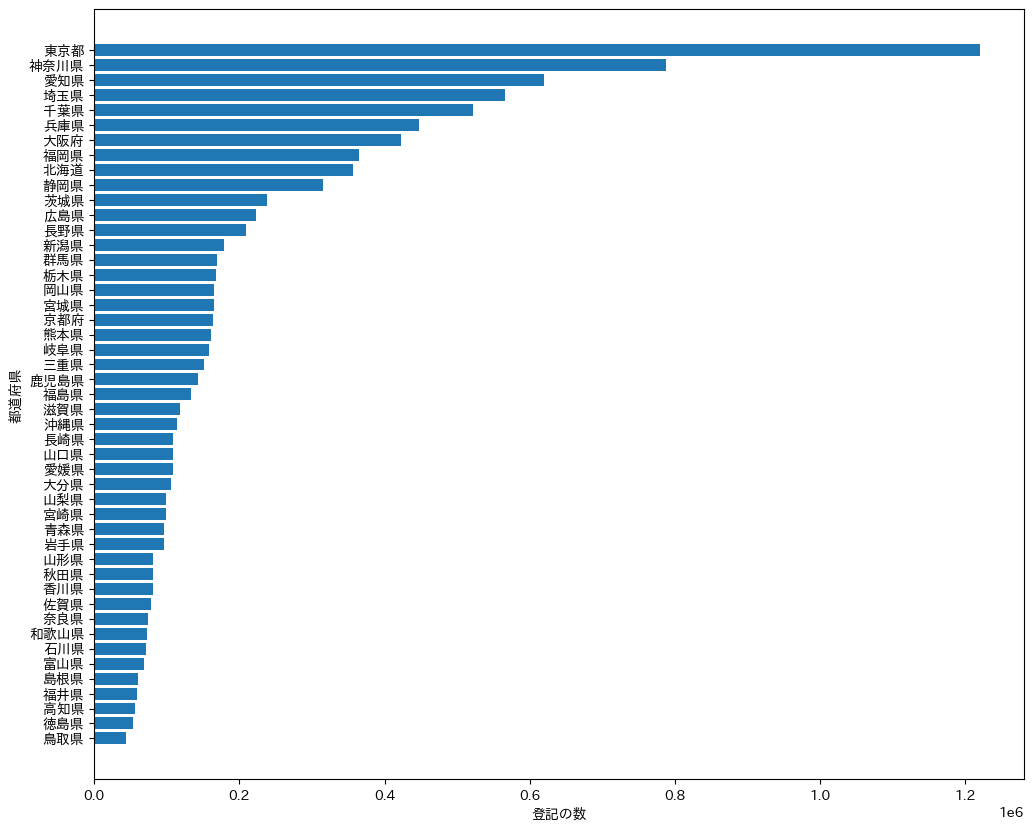

In [17]:
# Sort the data by land sales count for better visualization
land_sales_count_sorted = land_sales_count_by_prefecture.sort_values(by='Land Sales Count', ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 10))
plt.barh(land_sales_count_sorted['Prefecture'], land_sales_count_sorted['Land Sales Count'])
plt.xlabel('登記の数')
plt.ylabel('都道府県')
# plt.title('Number of Land Sales by Prefecture')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest values at the top
plt.show()


# 仮説1の検証
仮説1: 「不動産の所在地によって登記の種類に違いがある」

背景: 地域によって不動産市場の特性が異なる可能性があります。例えば、都市部と地方では登記の種類（売買、相続、抵当権設定など）が異なることが予想されます。

検証方法: 地域（都道府県や市区町村）ごとに登記の種類の頻度を比較します。

In [29]:
# 必要な列の抽出
df_subset = df_reg26[['pref', 'reason']]

# 欠損値の確認
missing_values = df_subset.isnull().sum()

# 欠損値の処理（今回は欠損値を含む行を削除）
df_clean = df_subset.dropna()

missing_values, df_clean.head()

(pref      0
 reason    0
 dtype: int64,
   pref               reason
 0  東京都         所有権移転相続・法人合併
 1  東京都  登記名義人の氏名等についての変更・更正
 2  東京都                   滅失
 3  東京都              所有権移転売買
 4  広島県              地目変更・更正)

## GPTにあげるため1/200を抽出

In [12]:
fraction = 1 / 200
# 指定された割合でランダムにサンプリング
sampled_df = df_reg26.sample(frac=fraction)

# サンプルデータを新しいCSVファイルとして保存
sampled_df.to_csv('不動産登記受付帳_200分の1.csv')

In [7]:
df_reg26["reason"].unique()

array(['所有権移転相続・法人合併', '登記名義人の氏名等についての変更・更正', '滅失', '所有権移転売買', '地目変更・更正',
       '処分の制限に関する登記', '分筆', '抹消登記', '所有権移転遺贈・贈与その他無償名義', '所有権の保存(申請)',
       '権利の移転(所有権を除く)', '抵当権の設定', '所有権移転その他の原因', '権利の変更・更正', '表題',
       '地積変更・更正', '根抵当権の設定', '区分建物の表題', '仮登記(その他)', '合筆', '共同担保変更通知',
       '仮登記(所有権)', '共同担保追加通知', '処分の制限に関する登記/嘱託', '所有権移転遺贈・贈与その他',
       '抹消登記/嘱託'], dtype=object)

# 所有者事項データ_土地(2022年以降の土地のオーナー情報　約118万件)

In [2]:
df_owner_land = pd.read_csv("C:/Users/fwdkdsa/OneDrive/後藤研/修士/TRUSTART/所有者事項データ_土地.csv")

C:\Users\fwdkdsa\AppData\Local\Temp\ipykernel_14456\574629118.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_owner_land = pd.read_csv("C:/Users/fwdkdsa/OneDrive/後藤研/修士/TRUSTART/所有者事項データ_土地.csv")


In [4]:
df_owner_land.head()

,no,type,location,land_number,branch_number,owner_address,owner_name,ownership_share,registration_application_date,free_input_field,company_name,registration_application_date1,pre,city,data_type
0,17,土地,東京都世田谷区上野毛１丁目,255-1,4,東京都世田谷区上野毛一丁目３１番１１－４０６号,加茂養子,１００００分の３５４,2023年4月1日 土曜日,NaN,一般社団法人 全国住宅ローン救済,2023-04-01,東京都,世田谷区,処分の制限
1,29,土地,東京都世田谷区上野毛１丁目,255-1,16,世田谷区上野毛一丁目３１番１１－５０４号,杉原眞理子,１００００分の１７３,2023年4月1日 土曜日,NaN,一般社団法人 全国住宅ローン救済,2023-04-01,東京都,世田谷区,処分の制限
2,36,土地,東京都世田谷区上野毛１丁目,255-1,23,世田谷区上野毛一丁目３１番１１－２０１号,丹野義夫,１００００分の３４７,2023年4月1日 土曜日,NaN,一般社団法人 全国住宅ローン救済,2023-04-01,東京都,世田谷区,処分の制限
3,42,土地,東京都世田谷区上野毛１丁目,255-1,29,世田谷区上野毛一丁目３１番１１－３０５号,白水朝日,１００００分の３３７,2023年4月1日 土曜日,NaN,一般社団法人 全国住宅ローン救済,2023-04-01,東京都,世田谷区,処分の制限
4,45,土地,東京都世田谷区上野毛１丁目,255-1,32,東京都稲城市矢野口１６８７番地ペアサイドマンション４０１号,野澤隆,１００００分の３４６,2023年4月1日 土曜日,NaN,一般社団法人 全国住宅ローン救済,2023-04-01,東京都,世田谷区,処分の制限


In [6]:
df_owner_land.columns

Index(['no', 'type', 'location', 'land_number', 'branch_number',
       'owner_address', 'owner_name', 'ownership_share',
       'registration_application_date', 'free_input_field', 'company_name',
       'registration_application_date1', 'pre', 'city', 'data_type'],
      dtype='object')

In [7]:
df_owner_land.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178385 entries, 0 to 1178384
Data columns (total 15 columns):
 #   Column                          Non-Null Count    Dtype 
---  ------                          --------------    ----- 
 0   no                              1178385 non-null  int64 
 1   type                            1178385 non-null  object
 2   location                        1178385 non-null  object
 3   land_number                     1178385 non-null  object
 4   branch_number                   1178385 non-null  int64 
 5   owner_address                   1178385 non-null  object
 6   owner_name                      1178385 non-null  object
 7   ownership_share                 932977 non-null   object
 8   registration_application_date   931863 non-null   object
 9   free_input_field                461 non-null      object
 10  company_name                    661383 non-null   object
 11  registration_application_date1  1178385 non-null  object
 12  pre           

In [10]:
df_owner_land_nonnan =  df_owner_land.dropna(subset="free_input_field")
df_owner_land_nonnan.head()

,no,type,location,land_number,branch_number,owner_address,owner_name,ownership_share,registration_application_date,free_input_field,company_name,registration_application_date1,pre,city,data_type
69232,50,土地,石川県河北郡内灘町字大根布１丁目,86-1,2,石川県河北郡内灘町字大根布九丁目５９番地,濱田翔悟,３分の２,NaN,所有権移転遺贈・贈与その他無償名義,株式会社さくらホーム,2023-07-01,石川県,河北郡内灘町,相続
69233,127,土地,石川県金沢市三馬３丁目,19-,2,河北郡内灘町字千鳥台四丁目１８番地,澤美智子,６０分の１９,NaN,所有権移転遺贈・贈与その他無償名義,株式会社さくらホーム,2023-07-01,石川県,金沢市,相続
69234,130,土地,石川県金沢市寺地１丁目,228-,1,金沢市寺地一丁目３３番１９号,株式会社アドバンス社,１０分の９,NaN,所有権移転相続・法人合併,株式会社さくらホーム,2023-07-01,石川県,金沢市,相続
69235,229,土地,石川県金沢市南新保町ロ,27-3,1,金沢市南新保町ハ４３番地３,高口初美,４分の２,NaN,所有権移転相続・法人合併,株式会社さくらホーム,2023-07-01,石川県,金沢市,相続
69236,266,土地,石川県金沢市米泉町２丁目,31-2,4,金沢市高尾南二丁目１７７番地,中本栄外定,９分の１,NaN,所有権移転相続・法人合併,株式会社さくらホーム,2023-07-01,石川県,金沢市,相続


In [4]:
print(df_owner_land.describe(include="all"))

                  no     type       location land_number  branch_number  \
count   1.178385e+06  1178385        1178385     1178385   1.178385e+06   
unique           NaN        1          47717       92486            NaN   
top              NaN       土地  東京都江戸川区清新町１丁目         4-5            NaN   
freq             NaN  1178385          24153       12893            NaN   
mean    4.533867e+03      NaN            NaN         NaN   5.096226e+01   
std     6.115148e+03      NaN            NaN         NaN   1.210709e+02   
min     1.000000e+00      NaN            NaN         NaN   1.000000e+00   
25%     5.980000e+02      NaN            NaN         NaN   1.000000e+00   
50%     1.970000e+03      NaN            NaN         NaN   7.000000e+00   
75%     5.350000e+03      NaN            NaN         NaN   3.500000e+01   
max     2.945500e+04      NaN            NaN         NaN   1.138000e+03   

            owner_address owner_name ownership_share  \
count             1178385    1178385       

# 所有者事項証明書_区分建物

In [23]:
df = pd.read_excel("C:/Users/fwdkdsa/OneDrive/後藤研/修士/TRUSTART/【サンプルデータ】所有者事項証明書_区分建物.xlsx")

In [24]:
df.head()

,id,no,type,location,land_number,branch_number,owner_address,owner_name,ownership_share,registration_application_date,free_input_field,company_name,registration_application_date1,pre,city,data_type
0,d4d9d4a7-a9b3-4a9c-939c-7e3975fe8e4e,1,区建,岡山県倉敷市田ノ上,661-4-401,1,倉敷市田ノ上６６１番地４（アルファウィズ老松４０１号）,中原功次,NaN,NaN,NaN,エスケーユニティ,2023-08-01,岡山県,倉敷市,遺贈贈与
1,e634a0fd-8e7d-4c99-a643-32acac5ac671,2,区建,岡山県倉敷市老松町３丁目,376-1-102,1,倉敷市老松町三丁目１４番３３－１０２号,岡田里佳,NaN,NaN,NaN,エスケーユニティ,2023-08-01,岡山県,倉敷市,遺贈贈与
2,cecfd301-ef22-469e-89c3-845d37af6c52,3,区建,岡山県岡山市北区大元１丁目,7-110-902,1,岡山市大元一丁目７番２２－９０２号,藤井実恵,７分の６,NaN,NaN,エスケーユニティ,2023-08-01,岡山県,岡山市北区,遺贈贈与
3,c2529bc3-c8f7-4ee1-b22c-09fc1e0d2b56,4,区建,岡山県岡山市北区大元１丁目,7-110-902,2,岡山市北区上中野一丁目４番１１号,藤井実恵,７分の１,NaN,NaN,エスケーユニティ,2023-08-01,岡山県,岡山市北区,遺贈贈与
4,046766d1-69a2-450f-b46a-c185bb3c3757,5,区建,岡山県岡山市北区奉還町１丁目,1-13-903,1,岡山市北区奉還町一丁目１１番８号ポレスターガーデンシティ清心９０３,羽原真美,NaN,NaN,NaN,エスケーユニティ,2023-08-01,岡山県,岡山市北区,遺贈贈与


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482306 entries, 0 to 482305
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              482306 non-null  object        
 1   no                              482306 non-null  int64         
 2   type                            482306 non-null  object        
 3   location                        482306 non-null  object        
 4   land_number                     482306 non-null  object        
 5   branch_number                   482306 non-null  int64         
 6   owner_address                   482306 non-null  object        
 7   owner_name                      482306 non-null  object        
 8   ownership_share                 422102 non-null  object        
 9   registration_application_date   412880 non-null  object        
 10  free_input_field                0 non-null       float64

# 受付帳全国_建物join_2022-2023_2

In [3]:
df = pd.read_csv("C:/Users/GUESTUSER/Desktop/fujiwara/data/受付帳全国_建物join_2022-2023_2.csv")

C:\TEMP\ipykernel_22040\3075227020.py:1: DtypeWarning: Columns (16,21,22,25,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/GUESTUSER/Desktop/fujiwara/data/受付帳全国_建物join_2022-2023_2.csv")


In [14]:
df.head()

,register_num,register_date,register_type,reason,pref,city,new_or_existing,type,location,land_num,other,lat,lon,size,building_coverage_ratio,floor_area_ratio,use_district,official_price,land_price,lat2,lon2,property_name,address,min_exclusive_area,max_exclusive_area,build_date,total_units,ground_floors,underground_floors,parking_spaces,main_direction,land_area,building_area,total_floor_area,max_layout,min_layout,property_type,structure
0,39362,2023-10-06,単独,所有権移転その他の原因,栃木県,宇都宮市,既,建物,宇都宮市インターパーク6丁目,5-3-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.485282,139.904661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,39691,2023-10-11,単独,所有権移転相続・法人合併,栃木県,さくら市,既,建物,さくら市氏家,1359-35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.665570,139.955952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8658,2023-10-11,連続,区分建物の表題,愛媛県,今治市,新,区分建物,今治市北日吉町2丁目,1010-1-901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.061826,132.985283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8982,2023-10-20,単独,表題,愛媛県,今治市,新,建物,今治市砂場町2丁目,232-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.105702,132.978301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32122,2023-10-04,連続,区分建物の表題/「表示」,和歌山県,和歌山市,新,区分建物,和歌山市太田1丁目,5-2-1201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.232337,135.192194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
len(df)

17196215

In [6]:
len(df["reason"].unique())

57768

reasonは57768個のまま

In [15]:
df["register_date"].unique()

<DatetimeArray>
['2023-10-06 00:00:00', '2023-10-11 00:00:00', '2023-10-20 00:00:00',
 '2023-10-04 00:00:00', '2023-10-24 00:00:00', '2023-10-31 00:00:00',
 '2023-10-12 00:00:00', '2023-10-10 00:00:00', '2023-10-02 00:00:00',
 '2023-10-25 00:00:00',
 ...
 '2022-07-31 00:00:00', '2022-02-19 00:00:00', '2022-12-03 00:00:00',
 '2022-04-09 00:00:00', '2022-07-30 00:00:00', '2022-03-12 00:00:00',
 '2022-05-14 00:00:00', '2022-05-28 00:00:00', '2022-06-12 00:00:00',
 '2022-04-29 00:00:00']
Length: 524, dtype: datetime64[ns]

In [22]:
df["type"].unique()

array(['建物', '区分建物', '一棟', '土地', '共担', 'その他'], dtype=object)

In [20]:
# Convert 'register_date' to datetime format if not already done
# Reconvert 'build_date' to datetime format with error handling
df['register_date'] = pd.to_datetime(df['register_date'], errors='coerce')

print(df['register_date'].max(), df['register_date'].min())

2023-12-28 00:00:00 2022-01-01 00:00:00


In [18]:
# Convert 'register_date' to datetime format if not already done
df['build_date'] = pd.to_datetime(df['build_date'], errors='coerce')

print(df['build_date'].max(), df['build_date'].min())

2023-08-01 00:00:00 1925-01-01 00:00:00


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17196215 entries, 0 to 17196214
Data columns (total 38 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   register_num             object        
 1   register_date            datetime64[ns]
 2   register_type            object        
 3   reason                   object        
 4   pref                     object        
 5   city                     object        
 6   new_or_existing          object        
 7   type                     object        
 8   location                 object        
 9   land_num                 object        
 10  other                    float64       
 11  lat                      float64       
 12  lon                      float64       
 13  size                     float64       
 14  building_coverage_ratio  float64       
 15  floor_area_ratio         float64       
 16  use_district             object        
 17  official_price           

In [8]:
# Check for missing values in the 'build_date' column
missing_build_date = df['build_date'].isnull().sum()

# Check for missing values in the entire dataframe
missing_values_overview = df.isnull().sum()
# missing_build_date
missing_build_date, missing_values_overview
# missing_values_overview


(np.int64(16168031),
 register_num                     58
 register_date                     0
 register_type                     0
 reason                          696
 pref                              0
 city                              0
 new_or_existing                   0
 type                              0
 location                          0
 land_num                      34232
 other                       8850108
 lat                         5826478
 lon                         5826478
 size                        7484891
 building_coverage_ratio    11155958
 floor_area_ratio           11155958
 use_district               11155958
 official_price              6371377
 land_price                  8027529
 lat2                       11371976
 lon2                       11371976
 property_name              16164956
 address                    16164956
 min_exclusive_area         16295176
 max_exclusive_area         16295220
 build_date                 16168031
 total_units     

In [21]:
# Filter the data to show only the rows where 'build_date' is not missing
non_missing_build_date = df[df['build_date'].notnull()]

# Display the first 11 rows with non-missing build_date
non_missing_build_date.head(11)

,register_num,register_date,register_type,reason,pref,city,new_or_existing,type,location,land_num,other,lat,lon,size,building_coverage_ratio,floor_area_ratio,use_district,official_price,land_price,lat2,lon2,property_name,address,min_exclusive_area,max_exclusive_area,build_date,total_units,ground_floors,underground_floors,parking_spaces,main_direction,land_area,building_area,total_floor_area,max_layout,min_layout,property_type,structure
1086,174,2023-01-05,単独,抹消登記,宮城県,仙台市泉区,既,区分建物,仙台市泉区八乙女中央5丁目,246-111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.309621,140.886618,パークアベニュー八乙女ガーデンステージ,宮城県仙台市泉区八乙女中央5丁目14番16号,68.94,104.56,2001-02-01,125.0,8.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,マンション,RC
1841,1005,2023-01-20,連先,所有権移転売買,東京都,新宿区,既,区分建物,新宿区北新宿3丁目,942-4-1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703252,139.690499,レグノ・セレーノ,東京都新宿区北新宿3丁目2番1号,NaN,NaN,2008-04-01,217.0,24.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,マンション,SRC
1842,1032,2023-01-20,連続,所有権移転売買,東京都,新宿区,既,区分建物,新宿区北新宿3丁目,942-4-1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703252,139.690499,レグノ・セレーノ,東京都新宿区北新宿3丁目2番1号,NaN,NaN,2008-04-01,217.0,24.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,マンション,SRC
1843,1033,2023-01-20,連続,抵当権の設定,東京都,新宿区,既,区分建物,新宿区北新宿3丁目,942-4-1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703252,139.690499,レグノ・セレーノ,東京都新宿区北新宿3丁目2番1号,NaN,NaN,2008-04-01,217.0,24.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,マンション,SRC
6369,53909,2023-10-26,連先,所有権移転売買,大阪府,大阪市平野区,既,区分建物,大阪市平野区加美西2丁目,3-7-1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.625313,135.562976,タウンハイツ加美,大阪府大阪市平野区加美西2丁目3番11号,43.18,67.43,1974-10-01,84.0,11.0,NaN,NaN,NaN,1011.0,585.0,6335.0,NaN,NaN,マンション,SRC
6370,53910,2023-10-26,連続,抵当権の設定,大阪府,大阪市平野区,既,区分建物,大阪市平野区加美西2丁目,3-7-1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.625313,135.562976,タウンハイツ加美,大阪府大阪市平野区加美西2丁目3番11号,43.18,67.43,1974-10-01,84.0,11.0,NaN,NaN,NaN,1011.0,585.0,6335.0,NaN,NaN,マンション,SRC
6452,71186,2023-11-29,単独,処分の制限に関する登記,宮城県,仙台市泉区,既,区分建物,仙台市泉区八乙女中央5丁目,246-111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.309621,140.886618,パークアベニュー八乙女ガーデンステージ,宮城県仙台市泉区八乙女中央5丁目14番16号,68.94,104.56,2001-02-01,125.0,8.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,マンション,RC
7241,13241,2023-03-24,単独,抹消登記,広島県,広島市西区,既,区分建物,広島市西区三滝本町2丁目,597-2-401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.418076,132.446707,ヴェルディ三滝邸ビューコート,広島県広島市西区三滝本町2丁目4番32号,100.00,101.15,2005-06-01,23.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,マンション,RC
9859,49983,2023-12-20,連先,登記名義人の氏名等についての変更・更正,神奈川県,川崎市高津区,既,区分建物,川崎市高津区久末,1778-1-625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.564593,139.626555,クレストフォルム日吉レインボーズヒルパークサイド棟,神奈川県川崎市高津区久末1778番1号,77.86,115.70,2005-01-01,117.0,8.0,1.0,299.0,NaN,NaN,NaN,NaN,NaN,NaN,マンション,RC
9860,49984,2023-12-20,連続,抹消登記,神奈川県,川崎市高津区,既,区分建物,川崎市高津区久末,1778-1-625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.564593,139.626555,クレストフォルム日吉レインボーズヒルパークサイド棟,神奈川県川崎市高津区久末1778番1号,77.86,115.70,2005-01-01,117.0,8.0,1.0,299.0,NaN,NaN,NaN,NaN,NaN,NaN,マンション,RC


In [17]:
non_missing_build_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028184 entries, 1086 to 17196214
Data columns (total 38 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   register_num             1028184 non-null  object        
 1   register_date            1028184 non-null  datetime64[ns]
 2   register_type            1028184 non-null  object        
 3   reason                   1028168 non-null  object        
 4   pref                     1028184 non-null  object        
 5   city                     1028184 non-null  object        
 6   new_or_existing          1028184 non-null  object        
 7   type                     1028184 non-null  object        
 8   location                 1028184 non-null  object        
 9   land_num                 1028184 non-null  object        
 10  other                    65839 non-null    float64       
 11  lat                      0 non-null        float64       
 12  l

C:\TEMP\ipykernel_22040\1680488869.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_buildings_address['build_date'] = pd.to_datetime(unique_buildings_address['build_date'], errors='coerce')


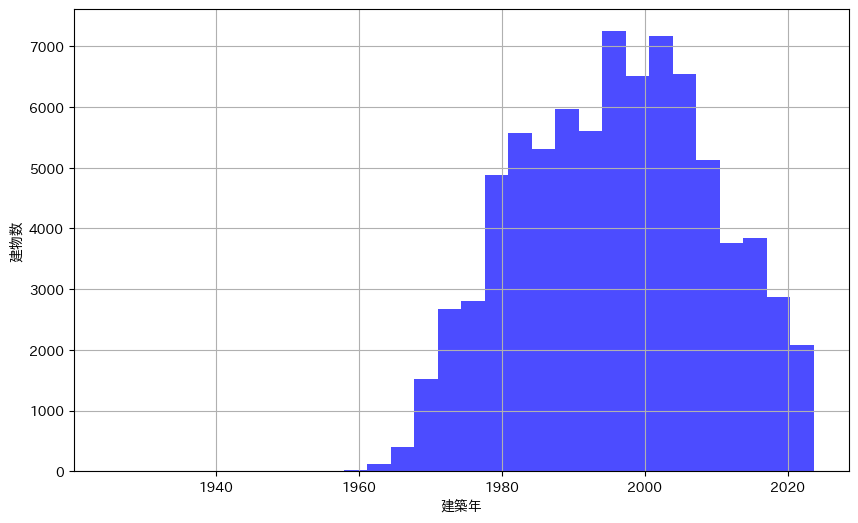

In [46]:
# Remove duplicates based on 'address' instead of 'register_num'
unique_buildings_address = df.drop_duplicates(subset=['address'])

# Clean the 'build_date' column for visualization
unique_buildings_address['build_date'] = pd.to_datetime(unique_buildings_address['build_date'], errors='coerce')
build_date_clean_unique_address = unique_buildings_address['build_date'].dropna()

# Plot the distribution of unique building construction dates (histogram)
plt.figure(figsize=(10, 6))
plt.hist(build_date_clean_unique_address, bins=30, color='blue', alpha=0.7)
# plt.title('Distribution of Building Construction Dates (Unique Addresses)')
plt.xlabel('建築年')
plt.ylabel('建物数')
plt.grid(True)
plt.show()

## dfに築年数（登記日-築年日）を追加

In [49]:
# Calculate the building age based on the registration date instead of the current year
df['register_date'] = pd.to_datetime(df['register_date'], errors='coerce')

# Calculate the building age and add it as a new column 'building_age'
df['building_age'] = df['register_date'].dt.year - df['build_date'].dt.year

,register_date,build_date,building_age
0,2023-10-06,NaT,NaN
1,2023-10-11,NaT,NaN
2,2023-10-11,NaT,NaN
3,2023-10-20,NaT,NaN
4,2023-10-04,NaT,NaN


In [50]:
df

,register_num,register_date,register_type,reason,pref,city,new_or_existing,type,location,land_num,other,lat,lon,size,building_coverage_ratio,floor_area_ratio,use_district,official_price,land_price,lat2,lon2,property_name,address,min_exclusive_area,max_exclusive_area,build_date,total_units,ground_floors,underground_floors,parking_spaces,main_direction,land_area,building_area,total_floor_area,max_layout,min_layout,property_type,structure,building_age
0,39362,2023-10-06,単独,所有権移転その他の原因,栃木県,宇都宮市,既,建物,宇都宮市インターパーク6丁目,5-3-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.485282,139.904661,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,39691,2023-10-11,単独,所有権移転相続・法人合併,栃木県,さくら市,既,建物,さくら市氏家,1359-35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.665570,139.955952,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8658,2023-10-11,連続,区分建物の表題,愛媛県,今治市,新,区分建物,今治市北日吉町2丁目,1010-1-901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.061826,132.985283,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8982,2023-10-20,単独,表題,愛媛県,今治市,新,建物,今治市砂場町2丁目,232-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.105702,132.978301,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32122,2023-10-04,連続,区分建物の表題/「表示」,和歌山県,和歌山市,新,区分建物,和歌山市太田1丁目,5-2-1201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.232337,135.192194,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17196210,22233,2022-06-01,単独,抹消登記/2753,京都府,京都市上京区,既,区分建物,京都市上京区元伊佐町,270-703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.029512,135.749840,パークホームズ今出川,京都府京都市上京区元伊佐町270番,48.77,82.18,2007-08-01,64.0,11.0,1.0,23.0,NaN,885.72,646.46,5559.35,3LDK,1LDK,マンション,RC,15.0
17196211,5159,2022-02-25,連先,登記名義人の氏名等についての変更・更正,東京都,杉並区,既,区分建物,杉並区井草2丁目,167-2-501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.727486,139.619764,グランヴァン杉並北,東京都杉並区井草2丁目20番8号,22.50,22.50,2000-09-01,29.0,7.0,NaN,NaN,NaN,355.04,186.73,917.32,NaN,NaN,マンション,RC,22.0
17196212,45521,2022-08-19,単独,所有権移転相続・法人合併,東京都,江東区,既,区分建物,江東区新砂2丁目,625-92-411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.669377,139.826857,メロディーハイム南砂町フェイシア,東京都江東区新砂2丁目1番27号,66.10,93.52,2005-02-01,171.0,7.0,NaN,105.0,NaN,6386.71,3028.64,15006.88,4LDK,2LDK,マンション,RC,17.0
17196213,5161,2022-02-25,連続,根抵当権の設定,東京都,杉並区,既,区分建物,杉並区井草2丁目,167-2-501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.727486,139.619764,グランヴァン杉並北,東京都杉並区井草2丁目20番8号,22.50,22.50,2000-09-01,29.0,7.0,NaN,NaN,NaN,355.04,186.73,917.32,NaN,NaN,マンション,RC,22.0


In [54]:
# Check for missing values in the 'build_date' column
missing_build_date = df['building_age'].notnull().sum()
# missing_build_date
missing_build_date

np.int64(1028184)

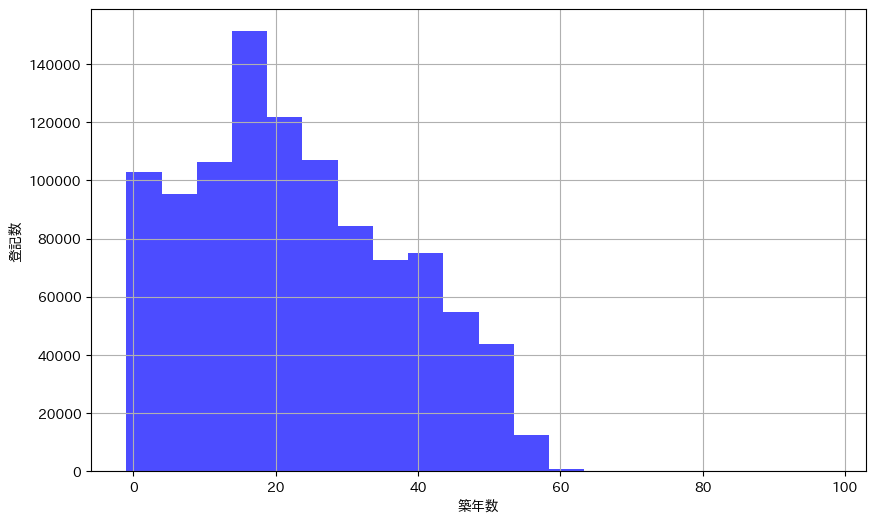

In [56]:
non_missing_building_age = df['building_age'].dropna()

# Plot the histogram for 'building_age'
plt.figure(figsize=(10, 6))
plt.hist(non_missing_building_age, bins=20, color='blue', alpha=0.7)
# plt.title('Distribution of Building Age')
plt.xlabel('築年数')
plt.ylabel('登記数')
plt.grid(True)
plt.show()


In [57]:
# Save the DataFrame to a CSV file
output_file_path = 'C:/Users/GUESTUSER/Desktop/fujiwara/data/登記受付帳_築年数追加.csv'
df.to_csv(output_file_path, index=False, encoding='utf-8-sig')

# 都道府県ごとの所有権移転売買のカウント

In [6]:
data=df_reg26

In [8]:
# Filter the data to include only rows where the reason is "所有権移転売買"
land_sales_data = data[data['reason'] == '所有権移転売買']

# Count the number of land sales per prefecture
land_sales_count_by_prefecture = land_sales_data['pref'].value_counts().reset_index()
land_sales_count_by_prefecture.columns = ['Prefecture', 'Land Sales Count']

land_sales_count_by_prefecture

,Prefecture,Land Sales Count
0,東京都,242187
1,神奈川県,144753
2,埼玉県,103981
3,千葉県,101700
4,愛知県,89747
5,大阪府,84840
6,兵庫県,82609
7,北海道,70539
8,福岡県,65914
9,静岡県,50449


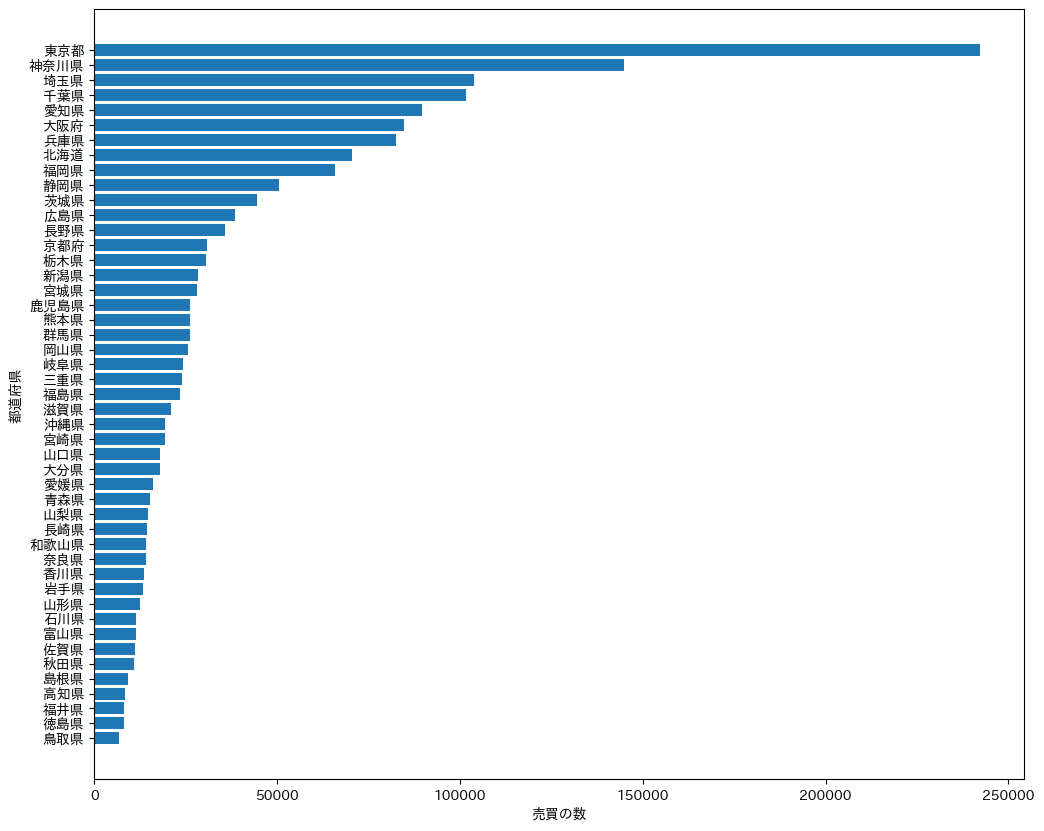

In [20]:
# import matplotlib.pyplot as plt

# Sort the data by land sales count for better visualization
land_sales_count_sorted = land_sales_count_by_prefecture.sort_values(by='Land Sales Count', ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 10))
plt.barh(land_sales_count_sorted['Prefecture'], land_sales_count_sorted['Land Sales Count'])
plt.xlabel('売買の数')
plt.ylabel('都道府県')
# plt.title('Number of Land Sales by Prefecture')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest values at the top
plt.show()
